# The Superdense Coding protocol

In [12]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Similarly to the teleportation protocol, the observers Alice (A) and Bob (B) share and entangled state given by the Bell state $\ket{\phi^+}$. 

However, now A wishes to transmit two classical bits to Bob, which we shall call c and d by using one qubit through the communication channel. 

Superdense coding just shows how we can use entanglement to double the classical information-carrying capacity of quantum qubits.

The idea behind this protocol is pretty simple: Alice effectively chooses which Bell state she would like to be sharing with Bob, she sends Bob her qubit, and Bob measures to determine which Bell state Alice chose.

In [13]:
# We first specify the bits to be transmited

c = '1'
d = '0'

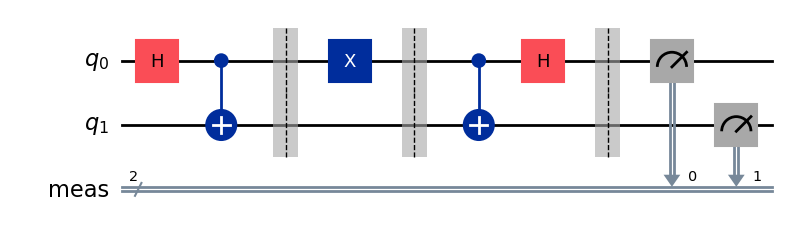

In [14]:
# We build the circuit accordingly 

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all() # Measures all of the qubits into one classical register

display(protocol.draw('mpl'))

We run the Aer Simulator to see the output

Measured 10 with frequency 1.0


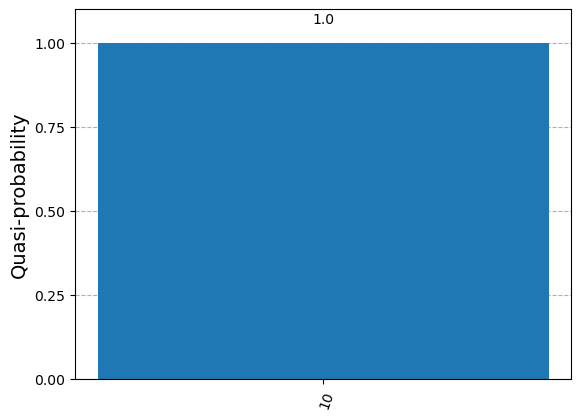

In [15]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

We can generalize the choice of c and d classical bits by using an additional qubit as a random generator. We then use the superdense coding protocol to see that the generated bits are transmitted correctly.

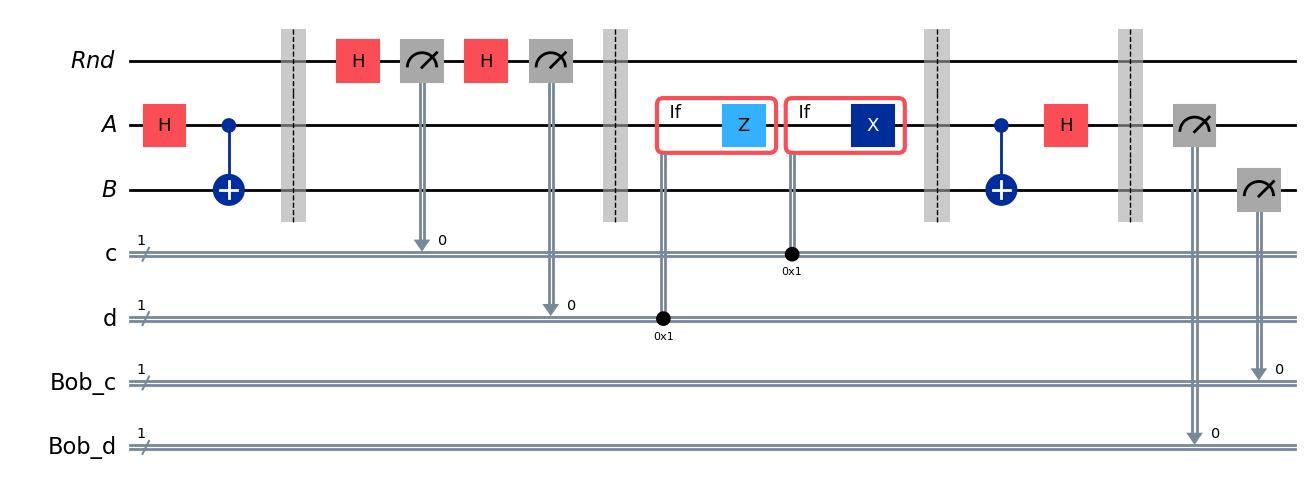

In [16]:
randomizer = QuantumRegister(1, 'Rnd')
alice = QuantumRegister(1, 'A')
bob = QuantumRegister(1, 'B')

Alice_c = ClassicalRegister(1, 'c')
Alice_d = ClassicalRegister(1, 'd')

Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")

test_protocol = QuantumCircuit(randomizer, alice, bob, Alice_c, Alice_d)

# Initialize the entangled state
test_protocol.h(alice)
test_protocol.cx(alice, bob)
test_protocol.barrier()

# Use the random qubit generator twice to generate Alice's bits
test_protocol.h(randomizer)
test_protocol.measure(randomizer, Alice_c)

test_protocol.h(randomizer)
test_protocol.measure(randomizer, Alice_d)
test_protocol.barrier()

# Perform Alice's operations
with test_protocol.if_test((Alice_d,1), label='Z'):
    test_protocol.z(alice)
with test_protocol.if_test((Alice_c,1), label='X'):
    test_protocol.x(alice)
test_protocol.barrier()

# Bob's actions
test_protocol.cx(alice, bob)
test_protocol.h(alice)
test_protocol.barrier()

# Add the Bob's measurements
test_protocol.add_register(Bob_c)
test_protocol.add_register(Bob_d)
test_protocol.measure(alice, Bob_d)
test_protocol.measure(bob, Bob_c)

display(test_protocol.draw('mpl'))


Run again the Aer Simulator to display the results. 

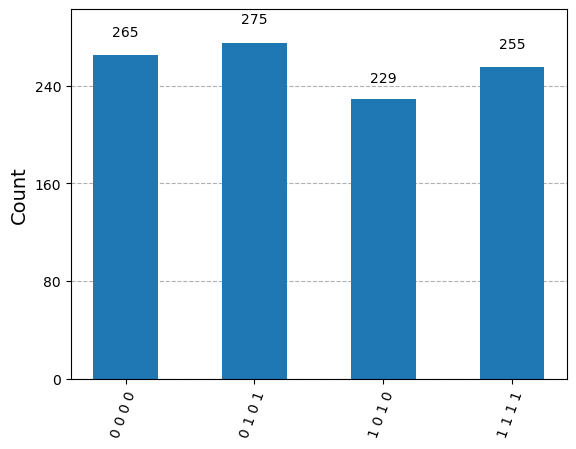

In [18]:
result = AerSimulator().run(test_protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

Alice and Bob's bits always agree! Recall the order in e.g. 0101 (from how we built the protocol) is of the form

0, 1, 0, 1, = Bob_c, Bob_d, c, d

Being c, d the Alice's classical bits.
